# Dataset

For this experiment we will us the [artchallenge.ru](https://www.kaggle.com/ikarus777/best-artworks-of-all-time) datset.

In [5]:
import pandas as pd

df = pd.read_csv('data/artists.csv', index_col='id')
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings
id,,,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


## Files

In [6]:
import os

images_directory = 'data/images/images/'
artists = [artist for artist in os.listdir(images_directory)]
files_df = pd.DataFrame(columns=['filename', 'path'])
for artist in artists:
    for file_ in os.listdir(os.path.join(images_directory, artist)):
        files_df = files_df.append({
            'filename': file_,
            'path': (images_directory + artist + '/' + file_)},
            ignore_index=True)

files_df

,filename,path
0,Piet_Mondrian_38.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...
1,Piet_Mondrian_10.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...
2,Piet_Mondrian_11.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...
3,Piet_Mondrian_39.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...
4,Piet_Mondrian_13.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...
...,...,...
8769,Albrecht_Dürer_17.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...
8770,Albrecht_Dürer_184.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...
8771,Albrecht_Dürer_190.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...
8772,Albrecht_Dürer_147.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...


### Images dimensions

In [7]:
import cv2

def image_dimensions(file_location):
    img = cv2.imread(file_location, cv2.IMREAD_UNCHANGED)
    return img.shape


files_df['height'] = files_df['path'].apply(lambda x: image_dimensions(x)[0])
files_df['width'] = files_df['path'].apply(lambda x: image_dimensions(x)[1])
files_df['channels'] = files_df['path'].apply(lambda x: image_dimensions(x))
files_df['shape'] = files_df['channels'].apply(lambda x: len(x))

files_df

,filename,path,height,width,channels,shape
0,Piet_Mondrian_38.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,912,694,"(912, 694, 3)",3
1,Piet_Mondrian_10.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,604,800,"(604, 800, 3)",3
2,Piet_Mondrian_11.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,1320,747,"(1320, 747, 3)",3
3,Piet_Mondrian_39.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,1116,725,"(1116, 725, 3)",3
4,Piet_Mondrian_13.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,925,751,"(925, 751, 3)",3
...,...,...,...,...,...,...
8769,Albrecht_Dürer_17.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,1024,816,"(1024, 816, 3)",3
8770,Albrecht_Dürer_184.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,1460,2560,"(1460, 2560, 3)",3
8771,Albrecht_Dürer_190.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,1773,2560,"(1773, 2560, 3)",3
8772,Albrecht_Dürer_147.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,2048,1370,"(2048, 1370, 3)",3


We will only use RGB images larger than 256x256

In [8]:
rgb_df = files_df[files_df['shape'] == 3]
full_size = rgb_df[(rgb_df['height'] >= 256) & (rgb_df['width'] >= 256)]

In [9]:
# full_size.to_csv('data/full_rgb_images.csv')

In [10]:
full_size

,filename,path,height,width,channels,shape
0,Piet_Mondrian_38.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,912,694,"(912, 694, 3)",3
1,Piet_Mondrian_10.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,604,800,"(604, 800, 3)",3
2,Piet_Mondrian_11.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,1320,747,"(1320, 747, 3)",3
3,Piet_Mondrian_39.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,1116,725,"(1116, 725, 3)",3
4,Piet_Mondrian_13.jpg,data/images/images/Piet_Mondrian/Piet_Mondrian...,925,751,"(925, 751, 3)",3
...,...,...,...,...,...,...
8769,Albrecht_Dürer_17.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,1024,816,"(1024, 816, 3)",3
8770,Albrecht_Dürer_184.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,1460,2560,"(1460, 2560, 3)",3
8771,Albrecht_Dürer_190.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,1773,2560,"(1773, 2560, 3)",3
8772,Albrecht_Dürer_147.jpg,data/images/images/Albrecht_Dürer/Albrecht_Du...,2048,1370,"(2048, 1370, 3)",3


In [11]:
print('Min height:', full_size['height'].min())
print('Min width:', full_size['width'].min())
print('Channels count:', full_size['shape'].value_counts())

Min height: 258
Min width: 260
Channels count: 3    8682
Name: shape, dtype: int64


## Image processing

1. Resize image to 256x256
2. Split image into N columns

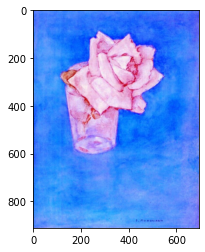

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread(full_size['path'].iloc[0])
plt.imshow(image)

In [33]:
# 1. Resize image
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(256),
     transforms.CenterCrop((256, 256))])

In [28]:

save_image(transform(image), 'test_transform.png')

In [29]:
def resize(image_location):
    image = cv2.imread(image_location)
    filename = 'data/256/' + image_location.split('/')[-1]
    save_image(transform(image), filename)




In [34]:
full_size['path'].apply(lambda x: resize(x))

0       None
1       None
2       None
3       None
4       None
        ... 
8769    None
8770    None
8771    None
8772    None
8773    None
Name: path, Length: 8682, dtype: object

In [41]:
# 2.Split images
import numpy as np

image = cv2.imread('data/256/Albrecht_Du╠êrer_1.jpg')

img_array = np.array(image)

In [42]:
img_array.shape

(256, 256, 3)

In [50]:
img_array[:, :128, :].shape

(256, 128, 3)

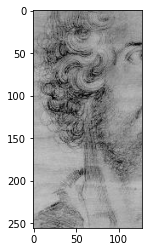

In [51]:
plt.imshow(img_array[:, :128, :])

In [53]:
slice_1 = img_array[:, :64, :]
slice_2 = img_array[:, 64:128, :]
slice_3 = img_array[:, 128:192, :]
slice_4 = img_array[:, 192:256, :]

In [54]:
print(slice_1.shape)
print(slice_2.shape)
print(slice_3.shape)
print(slice_4.shape)

(256, 64, 3)
(256, 64, 3)
(256, 64, 3)
(256, 64, 3)


In [73]:
def split_image(image_path):
    image = cv2.imread(image_location)
    img_array = np.array(image)
    slice_1 = img_array[:, :64, :]
    slice_2 = img_array[:, 64:128, :]
    slice_3 = img_array[:, 128:192, :]
    slice_4 = img_array[:, 192:256, :]
    filename = image_location.split('/')[-1]
    cv2.imwrite(('data/columns/' + '1_' + filename), slice_1)
    cv2.imwrite(('data/columns/' + '2_' + filename), slice_2)
    cv2.imwrite(('data/columns/' + '3_' + filename), slice_3)
    cv2.imwrite(('data/columns/' + '4_' + filename), slice_4)

In [75]:
root_dir = 'data/256/'
for i in os.listdir(root_dir):
    image_location = root_dir + i
    # print(image_location)
    split_image(image_location)


In [88]:
columns_df = pd.DataFrame(columns=['file'])

In [89]:
for image in os.listdir('data/columns'):
    columns_df = columns_df.append({
        'file': image
    }, ignore_index=True)


In [90]:
columns_df['column'] = columns_df['file'].apply(lambda x: x.split('_')[0])

In [91]:
columns_df['target'] = columns_df['file'].apply(lambda x: x.split('_'))

,file,column
0,1_Albrecht_Dürer_110.jpg,1
1,2_Francisco_Goya_96.jpg,2
2,1_Sandro_Botticelli_20.jpg,1
3,4_Vincent_van_Gogh_702.jpg,4
4,2_Amedeo_Modigliani_63.jpg,2
...,...,...
34723,3_Vincent_van_Gogh_417.jpg,3
34724,1_Alfred_Sisley_175.jpg,1
34725,1_Pierre-Auguste_Renoir_96.jpg,1
34726,1_Sandro_Botticelli_39.jpg,1


In [111]:
def get_target(file_name):
    column = int(file_name.split('_')[0])
    target_column = column + 1
    return file_name.replace((str(column) + '_'), (str(target_column) + '_'))

In [112]:
columns_df['target'] = columns_df['file'].apply(get_target)
columns_df

,file,column,target
0,1_Albrecht_Dürer_110.jpg,1,2_Albrecht_Dürer_110.jpg
1,2_Francisco_Goya_96.jpg,2,3_Francisco_Goya_96.jpg
2,1_Sandro_Botticelli_20.jpg,1,2_Sandro_Botticelli_20.jpg
3,4_Vincent_van_Gogh_702.jpg,4,5_Vincent_van_Gogh_702.jpg
4,2_Amedeo_Modigliani_63.jpg,2,3_Amedeo_Modigliani_63.jpg
...,...,...,...
34723,3_Vincent_van_Gogh_417.jpg,3,4_Vincent_van_Gogh_417.jpg
34724,1_Alfred_Sisley_175.jpg,1,2_Alfred_Sisley_175.jpg
34725,1_Pierre-Auguste_Renoir_96.jpg,1,2_Pierre-Auguste_Renoir_96.jpg
34726,1_Sandro_Botticelli_39.jpg,1,2_Sandro_Botticelli_39.jpg


In [114]:
images_df = columns_df[columns_df['column'] != '4']
images_df

,file,column,target
0,1_Albrecht_Dürer_110.jpg,1,2_Albrecht_Dürer_110.jpg
1,2_Francisco_Goya_96.jpg,2,3_Francisco_Goya_96.jpg
2,1_Sandro_Botticelli_20.jpg,1,2_Sandro_Botticelli_20.jpg
4,2_Amedeo_Modigliani_63.jpg,2,3_Amedeo_Modigliani_63.jpg
5,1_Vincent_van_Gogh_808.jpg,1,2_Vincent_van_Gogh_808.jpg
...,...,...,...
34723,3_Vincent_van_Gogh_417.jpg,3,4_Vincent_van_Gogh_417.jpg
34724,1_Alfred_Sisley_175.jpg,1,2_Alfred_Sisley_175.jpg
34725,1_Pierre-Auguste_Renoir_96.jpg,1,2_Pierre-Auguste_Renoir_96.jpg
34726,1_Sandro_Botticelli_39.jpg,1,2_Sandro_Botticelli_39.jpg


In [115]:
images_df['column'].value_counts()

3    8682
1    8682
2    8682
Name: column, dtype: int64

In [118]:
images_df[['file', 'target']].to_csv('data/columns.csv', index=False)